<a href="https://colab.research.google.com/github/git-ashiq/kaggle-titanic/blob/master/titanic_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic: Machine Learning from Disaster**

#### **The Challenge:**

To build a predictive model for “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).














### **Steps:**
1.   Question or problem definition
2.   Data Collection
3.   Exploratory Data Analysis
4.   Feature Engineering
5.   Modelling
6.   Testing
7.   Submitting



---



### **1. Defining the problem statement**

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we need to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

**Let us first learn about the structure of the Titanic ship.**

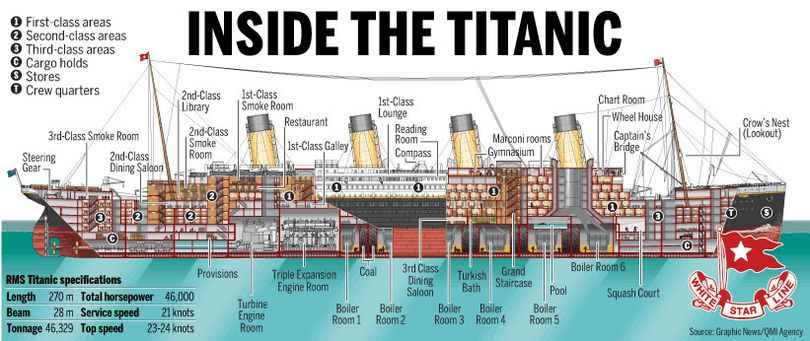

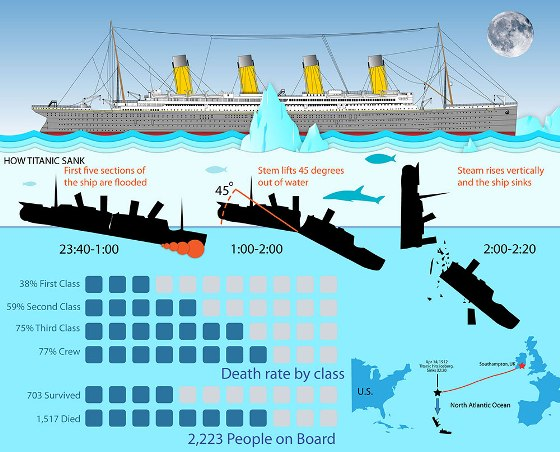

In [203]:
# To display the image in the notebook.
from IPython.display import Image, display
titanicship = ['https://i.pinimg.com/originals/74/ca/9e/74ca9e97625780b5d528a5f62110e1d8.jpg', 'http://www.infographicszone.com/wp-content/uploads/2012/10/the-RMS-titanic-1.jpg' ]

for ship in titanicship:
  display(Image(ship))
  print () 



---



### **2.Data Collection**

Collecting training and testing data from Kaggle.
you can download it from https://www.kaggle.com/c/titanic/data

##### **2.1 Google Colaboratory and Kaggle datasets API setup**

FYI: https://medium.com/@saedhussain/google-colaboratory-and-kaggle-datasets-b57a83eb6ef8

In [204]:
# Install Kaggle library
!pip install kaggle 

In [205]:
# Colab library to upload files to notebook
from google.colab import files

# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [207]:
# Download datasets for the Titanic challenge
!kaggle competitions download -c titanic

train.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)


In [208]:
!ls

gender_submission.csv  sample_data  test.csv  train.csv


#### **2.2 Loading Libraries**

In [0]:
# Import Pandas for Data Manipulation and analyse
import pandas as pd

# Visulization library
import matplotlib.pyplot as plt
%matplotlib inline

#  Visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
sns.set() # setting seaborn as default for plots



In [0]:
# You can suppress all warnings:
import warnings
warnings.filterwarnings("ignore")

##### **2.3 Load train, test dataset using Pandas**

In [0]:
# Import Pandas to load datas

# Copy the path from files
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')



---



### **3.Exploratory Data Analysis**

In this stage, we will anaylze the data by following two methods and try to understand the patterns of the data.
*   Analyse by Describing data
*   Analyse by Visualizing data

##### **3.1 Analyze by Describing data**
Data Dictionary, Data Types, Data Informations, Data Statistical Informations

In [212]:
# Print first five rows of dataset
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [213]:
# To display the column names of the dataset 
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


**Data Dictionary**

Variable definition of the dataset.

1.   **PassengerId:** An unique index for passenger rows.
2.   **Survived:** Shows if the passenger survived or not. 1 stands for survived and 0 stands for not survived.
3.  **Pclass:** Ticket class. 1 stands for First class ticket. 2 stands for Second class ticket. 3 stands for Third class ticket.
4.   **Name:** Passenger's name with title."Mr" for man. "Mrs" for woman. "Miss" for girl. "Master" for boy.
5.   **Sex:**	Passenger's sex. It's either Male or Female.
6.   **Age:** Passenger's age
7.   **Sibsp:**	# of siblings / spouses travelling with each passnager
8.   **Parch:**	# of parents / children  travelling with each passenger.
9.   **Ticket:**	Ticket number
10.   **Fare:**	Passenger fare
11.   **Cabin:**	Cabin number of the passenger
12.   **Embarked:**	Port from where the particular passenger was embarked/boarded	C = Cherbourg, Q = Queenstown, S = Southampton



**Data Types**

*   Nominal categorical features: Survived, Sex, and Embarked. 
*   Ordinal categorical features: Pclass.
*   Continous numerical features: Age, Fare.
*   Discrete numerical features: Sibsp, Parch.
*   Alphanumeric: Ticket, Cabin.
*   Typos: Name

> **Type summary**: Integer or floats:7 & Strings (object):5




---



**Data Informations:**

General Infomation about datasets

> **Cabin, Age, Embarked**  Features contain null or empty values in both training & test datasets


In [214]:
# Print the Information about the Datasets
train.info()
print('-'*50)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         41

In [215]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64



---



**Data Statistical Information**

Statistical Information about the datasets

In [216]:
#To view some basic statistical details
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Distribution of Numerical value features across the samples:**

*   **Survival Rate** : Around 38% of passengers survived in the datasets
*   **Age Distribution**: 0.4 to 80 with avg of 29 (Nearly 20 % Null values)
*   **Sibsp**: Nearly 30% of the passengers had siblings or spouse
*   **Parch**: More than 75% of the passengers did not travel with Parents & Children
*   **Fare Range**: 0 to 512 USD with avg of 32 USD


In [217]:
#To view some basic statistical details for categorical features
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Petranec, Miss. Matilda",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


**Distribution of Categorical value features across the samples:**

*   **Sex**: Two unique values, with 65 % Male passengers 
*   **Ticket**: 23% Duplicate values. Otherwise, same ticket number for group of passengers.
*   **Cabin**: More than 80% Null values. Alternatively several passengers shared a cabin.
*   **Embarked**: 3 Unique values, with 72 % of S

**To find the Percentage:** = ((frequency/total)x100) | 
 **Null values** = ((total-frequency)/total)x100)




---



#### **3.2 Anaylse by Pivoting feature**

Relationship between Features and Survival

In this section, we analyze relationship between different features with respect to Survival

Firstly, we will analyse the correlation of the survival with following features.

*   Categorical features with zero null values (Pclass, Sex)
*   Numerical features with zero null values (SibSp, Parch, Fare)



**Pclass vs Survival**

Higher class passengers have better survival chance. Survival rate = 62% in Pclass 1


In [218]:
# Pclass & Survival
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(['Survived'], ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


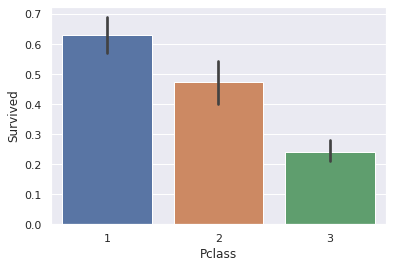

In [219]:
#train.groupby('Pclass').Survived.mean().plot(kind='bar')
sns.barplot(x='Pclass', y='Survived', data=train)



---



**Sex vs Survival**

Female passengers have better survival chance. Survival rate = 74%

In [220]:
# Sex & Survival
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(['Sex'], ascending=False)

,Sex,Survived
1,male,0.188908
0,female,0.742038


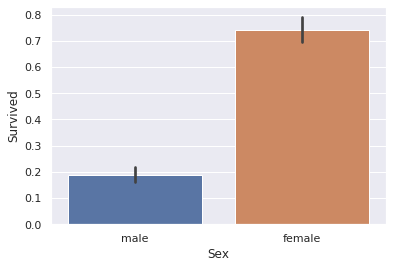

In [221]:
# train.groupby('Sex').Survived.mean().plot(kind='bar')
sns.barplot(x='Sex', y='Survived', data=train)



---



**Pclass & Sex vs Survival**

The Graph represents.

*   Female passenger from 1st and 2nd Pclass have almost 100% survival chance.
*   Male from 2nd and 3rd Pclass have only around 10% survival chance



In [222]:
# Pclass & Sex vs Survival
# Total numberof male & female passengers in each class

tab = pd.crosstab(train['Pclass'], train['Sex'])
print(tab)

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


Text(0, 0.5, 'Percentage')

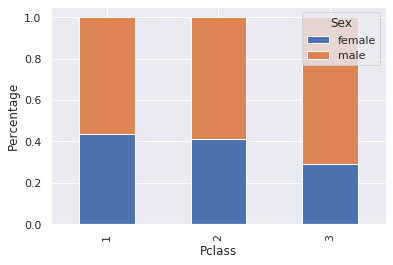

In [223]:
# Total number of male & female passengers percentage in each class

tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

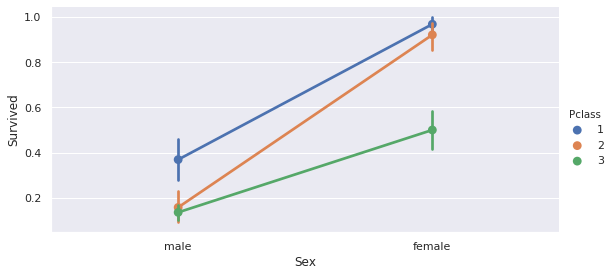

In [224]:
sns.factorplot('Sex', 'Survived', hue='Pclass', height=4, aspect=2, data=train)




---



**Embarked vs Survival**

Passenger embarked from 'C' have more than 50% survival chance.

In [225]:
# Counts of the passenger embarked 
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [226]:
# passenger Survived
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [227]:
# Mean of the passenger survived.
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


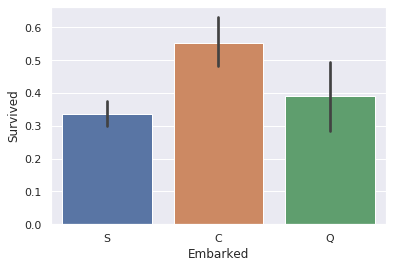

In [228]:
#train.groupby('Embarked').Survived.mean().plot(kind='bar')
sns.barplot(x='Embarked', y='Survived', data=train)



---



**Parch vs Survival**

Passenger have 1 or more parents or childern have more survival chance


In [229]:
# Counts of the Parents & children for passenger
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [230]:
# Passenger survived who have parents and children
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [231]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


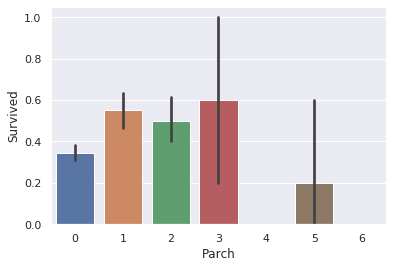

In [232]:
sns.barplot(x='Parch', y='Survived', data=train)



---



**Sibsp vs Survival**

Passenger have 1 or more Siblings have more survival chance

In [233]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [234]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [235]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


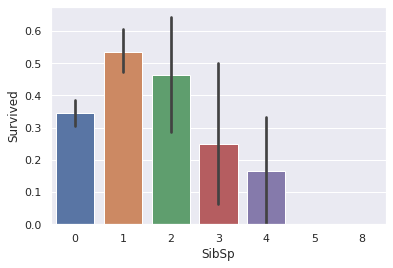

In [236]:
sns.barplot(x='SibSp', y='Survived', data=train)



---



### **4. Feature Engineering**

Feature engineering is the process of using **domain knowledge** of the data to create features that make machine learning algorithms work. 

If feature engineering is done correctly, it increases the predictive power of machine learning algorithms by creating features from raw data that help facilitate the machine learning process. 

Feature Engineering is an **art**.

In this stage, we can **Wrangle, Prepare & Cleanse the data** by following processes.

Classifying, Correlating, Converting, Completing, Correcting, Creating, Charting.


**Name**

Let's first extract titles from Name column.

**Creating:**
We have created the new column 'Title' in the dataset, this column is extracted from the Name column.

In [0]:
# Combine trian and test data.
train_test_data = [train, test]

for dataset in train_test_data:
  dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.')

In [238]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [239]:
train.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Don           1
Mme           1
Ms            1
Lady          1
Capt          1
Countess      1
Jonkheer      1
Sir           1
Name: Title, dtype: int64

In [240]:
test.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [241]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [0]:
# Replace some common titles with the name "Other"

for dataset in train_test_data:
  dataset ['Title'] = dataset['Title'].replace(['Ms', 'Mlle'], 'Miss')
  dataset ['Title'] = dataset['Title'].replace('Mme', 'Mrs')

  dataset ['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', \
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')


In [243]:
# Titlescount with each sex
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,126,0
Other,3,20


In [244]:
# find the mean of passengers survived with titles
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


**Converting:** Convert the categorical Title values into Numerical values for processing

In [0]:
# Converting: Convert the categorical Title values into Numerical values for processing
title_mapping = {"Mr":1, "Miss":2, "Mrs":3, "Master":4, "Other":5 }
for dataset in train_test_data:
  dataset['Title'] = dataset['Title'].map(title_mapping)
  dataset['Title'] = dataset['Title'].fillna(0)

In [246]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1




---



**Sex:**

**Converting:** We convert the categorical value of Sex into numeric. We represent 0 as female and 1 as male.

In [0]:
# Convert the categorical Sex values into Numerical values
for dataset in train_test_data:
  dataset['Sex'] = dataset['Sex'].map({'female':1, 'male':0}).astype(int)


In [248]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1




---



**Age:**

Fill the missing values of age by using median of the Titles group. 
Then we categorize the Age into 5 stages and create a new column called Ageband.


In [0]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Master, Others)

for dataset in train_test_data:
  dataset["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)


In [250]:
train.info()
print('-'*50)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 

In [251]:
# Categorizes age into 5 different age range
for dataset in train_test_data:
  dataset['AgeBand'] = pd.cut(dataset['Age'], 5)
  # convert age value full numeric values from floats
  dataset['Age'] = dataset['Age'].astype(int)

print (train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

            AgeBand  Survived
0    (0.34, 16.336]  0.548077
1  (16.336, 32.252]  0.327345
2  (32.252, 48.168]  0.439024
3  (48.168, 64.084]  0.428571
4    (64.084, 80.0]  0.090909


**Binning/Converting** Numerical Age to Categorical Variable & we map Age according to AgeBand

In [0]:
for dataset in train_test_data:
  dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0 
  dataset.loc[ (dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
  dataset.loc[ (dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
  dataset.loc[ (dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
  dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [253]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,S,1,"(16.336, 32.252]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,C,3,"(32.252, 48.168]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,2,"(16.336, 32.252]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,S,3,"(32.252, 48.168]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,S,1,"(32.252, 48.168]"


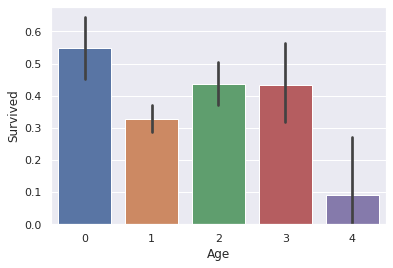

In [254]:
sns.barplot(x='Age', y='Survived', data=train)



---



**Fare**

Fill the missing values of Fare by using median of the Pclass group. Then we categorize the Fare into 5 stages and create a new column called FareBand.

In [0]:
# fill missing Fare with median fare for each Pclass (1st, 2nd & 3rd class)

for dataset in train_test_data:
  dataset["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [256]:
train.info()
print('-'*50)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
AgeBand        891 non-null category
dtypes: category(1), float64(1), int64(8), object(4)
memory usage: 91.7+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null int64
SibSp  

In [257]:
# Create FareBand. We divide the Fare into 4 category range.
for dataset in train_test_data:
  dataset['FareBand'] = pd.qcut(dataset['Fare'], 4)

print (train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

          FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [258]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,S,1,"(16.336, 32.252]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,C,3,"(32.252, 48.168]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,2,"(16.336, 32.252]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,S,3,"(32.252, 48.168]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,S,1,"(32.252, 48.168]","(7.91, 14.454]"


In [0]:
# Map Fare according to FareBand
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [260]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,S,1,"(16.336, 32.252]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C85,C,3,"(32.252, 48.168]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,S,2,"(16.336, 32.252]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C123,S,3,"(32.252, 48.168]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,S,1,"(32.252, 48.168]","(7.91, 14.454]"


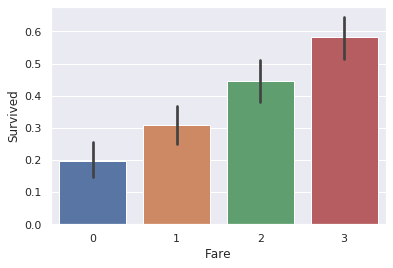

In [261]:
sns.barplot(x='Fare', y='Survived', data=train)



---



**SibSp & Parch Feature**

Combining SibSp & Parch feature and we create a new feature named FamilySize.

Passengers who have 2 or more family members hav bertter survival chance
Passengers who travlled alone have very less survival chance & who have more than 4 members also less survival chance.

In [262]:
for dataset in train_test_data:
  dataset['FamilySize'] =  dataset['SibSp'] + dataset['Parch'] + 1

print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [263]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FareBand,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,S,1,"(16.336, 32.252]","(-0.001, 7.91]",2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C85,C,3,"(32.252, 48.168]","(31.0, 512.329]",2
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,S,2,"(16.336, 32.252]","(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C123,S,3,"(32.252, 48.168]","(31.0, 512.329]",2
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,S,1,"(32.252, 48.168]","(7.91, 14.454]",1




---



**Embarked**

Fill the missing values of Embarked and we convert the categorical value of Embarked into numeric.



In [264]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [265]:
# check the number of passengers for each Embarked category
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
# The category "S" has maximum passengers. Hence, we replace the null values with S
for dataset in train_test_data:
  dataset ['Embarked'] = dataset['Embarked'].fillna('S')

In [267]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null int64
Cabin          204 non-null object
Embarked       891 non-null object
Title          891 non-null int64
AgeBand        891 non-null category
FareBand       891 non-null category
FamilySize     891 non-null int64
dtypes: category(2), int64(10), object(4)
memory usage: 99.8+ KB


In [0]:
# Convert the categorical value of Embarked into numeric. We represent 0 as S, 1 as C and 2 as Q.

for dataset in train_test_data:
  dataset['Embarked'] = dataset ['Embarked'].map({"S":0, "C":1, "Q":2}).astype(int)

In [269]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FareBand,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,1,"(16.336, 32.252]","(-0.001, 7.91]",2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C85,1,3,"(32.252, 48.168]","(31.0, 512.329]",2
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,0,2,"(16.336, 32.252]","(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C123,0,3,"(32.252, 48.168]","(31.0, 512.329]",2
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,0,1,"(32.252, 48.168]","(7.91, 14.454]",1




---



**Cabin:**



In [270]:
# Counts of the Cabins.
train.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F33            3
F2             3
              ..
B73            1
B71            1
E12            1
D28            1
E17            1
Name: Cabin, Length: 147, dtype: int64

In [0]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

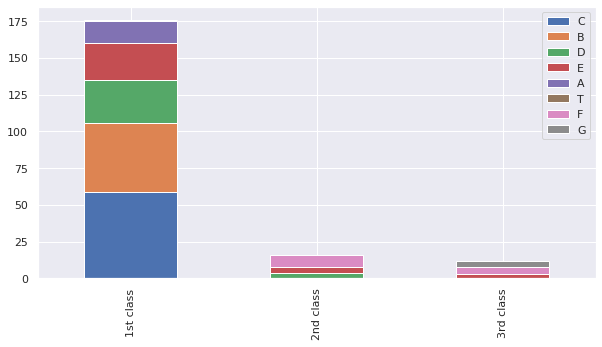

In [272]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [0]:
cabin_mapping = {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F": 5, "G": 6, "T": 7}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [0]:
# fill missing cabin with median cabin for each Pclass
for dataset in train_test_data:
  dataset["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
  dataset['Cabin'] = dataset['Cabin'].astype(int)
  

In [275]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FareBand,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,5,0,1,"(16.336, 32.252]","(-0.001, 7.91]",2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,2,1,3,"(32.252, 48.168]","(31.0, 512.329]",2
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,5,0,2,"(16.336, 32.252]","(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,2,0,3,"(32.252, 48.168]","(31.0, 512.329]",2
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,5,0,1,"(32.252, 48.168]","(7.91, 14.454]",1


In [276]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null int64
Cabin          891 non-null int64
Embarked       891 non-null int64
Title          891 non-null int64
AgeBand        891 non-null category
FareBand       891 non-null category
FamilySize     891 non-null int64
dtypes: category(2), int64(12), object(2)
memory usage: 99.8+ KB




---



In [277]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FareBand,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,5,0,1,"(16.336, 32.252]","(-0.001, 7.91]",2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,2,1,3,"(32.252, 48.168]","(31.0, 512.329]",2
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,5,0,2,"(16.336, 32.252]","(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,2,0,3,"(32.252, 48.168]","(31.0, 512.329]",2
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,5,0,1,"(32.252, 48.168]","(7.91, 14.454]",1


In [278]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FareBand,FamilySize
0,892,3,"Kelly, Mr. James",0,2,0,0,330911,0,5,2,1,"(30.502, 45.668]","(-0.001, 7.896]",1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,1,0,363272,0,2,0,3,"(45.668, 60.834]","(-0.001, 7.896]",2
2,894,2,"Myles, Mr. Thomas Francis",0,3,0,0,240276,1,5,2,1,"(60.834, 76.0]","(7.896, 14.454]",1
3,895,3,"Wirz, Mr. Albert",0,1,0,0,315154,1,2,0,1,"(15.336, 30.502]","(7.896, 14.454]",1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,1,5,0,3,"(15.336, 30.502]","(7.896, 14.454]",3


#### **4.1 Feature Selection:**

Feature Selection is one of the core concepts in machine learning which hugely impacts the performance of your model.

Irrelevant or partially relevant features can negatively impact model performance.

In [0]:
features_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'AgeBand', 'FareBand']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)


In [280]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1,0,5,0,1,2
1,2,1,1,1,2,3,2,1,3,2
2,3,1,3,1,1,1,5,0,2,1
3,4,1,1,1,2,3,2,0,3,2
4,5,0,3,0,2,1,5,0,1,1


In [0]:
# PassengerId is only dropped from Train set because we need PassengerId in Test set
train = train.drop(['PassengerId'], axis=1)

In [282]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1,0,5,0,1,2
1,1,1,1,2,3,2,1,3,2
2,1,3,1,1,1,5,0,2,1
3,1,1,1,2,3,2,0,3,2
4,0,3,0,2,1,5,0,1,1


In [283]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2,0,5,2,1,1
1,893,3,1,2,0,2,0,3,2
2,894,2,0,3,1,5,2,1,1
3,895,3,0,1,1,2,0,1,1
4,896,3,1,1,1,5,0,3,3


We are done with Feature Selection/Engineering. Now, we are ready to train a classifier with our feature set.


---



In [284]:
# Define Train & Test dataset.
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [285]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1,0,5,0,1,2
1,1,1,2,3,2,1,3,2
2,3,1,1,1,5,0,2,1
3,1,1,2,3,2,0,3,2
4,3,0,2,1,5,0,1,1
5,3,0,1,1,5,2,1,1
6,1,0,3,3,4,0,1,1
7,3,0,0,2,5,0,4,5
8,3,1,1,1,5,0,3,3
9,2,1,0,2,4,1,3,2




---



### **5. Modelling:**

Now we are ready to train a model and predict the required solution.
There are many classifying algorithms present. Among them, we choose the following Classification algorithms for our problem.


*   Logistic Regression
*   Support Vector Machines (SVC)
*   Linear SVC
*   k-Nearest Neighbor (KNN)
*   Decision Tree
*   Random Forest
*   Naive Bayes (GaussianNB)
*   Perceptron
*   Stochastic Gradient Descent (SGD)


In [0]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

import numpy as np

### **6.Cross Validation (K-fold)**

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

**Linear Regression**

In [309]:
clf = LogisticRegression()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.84444444 0.7752809  0.79775281 0.78651685 0.78651685 0.78651685
 0.78651685 0.83146067 0.82022472 0.83146067]


In [310]:
#Logistic Regression Score
round(np.mean(score)*100, 2)

80.47



---



**Linear SVC**

In [311]:
clf = LinearSVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.7752809  0.80898876 0.79775281 0.79775281 0.79775281
 0.7752809  0.82022472 0.80898876 0.84269663]


In [312]:
#Logistic Regression Score
round(np.mean(score)*100, 2)

80.36



---



**KNN**

In [299]:
clf = KNeighborsClassifier(n_neighbors=14)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.82022472 0.84269663 0.82022472 0.87640449 0.83146067
 0.82022472 0.76404494 0.82022472 0.76404494]


In [300]:
#KNN Score
round(np.mean(score)*100, 2)

81.82



---



**Decision Tree**

In [301]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.78888889 0.88764045 0.82022472 0.78651685 0.87640449 0.80898876
 0.83146067 0.82022472 0.75280899 0.80898876]


In [302]:
# decision tree Score
round(np.mean(score)*100, 2)

81.82



---



**Random Forest**

In [303]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85555556 0.85393258 0.79775281 0.7752809  0.88764045 0.80898876
 0.84269663 0.80898876 0.76404494 0.82022472]


In [304]:
# Random Forest Score
round(np.mean(score)*100, 2)

82.15



---



**Naive Bayes**

In [305]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.74157303 0.73033708 0.74157303 0.71910112 0.79775281
 0.73033708 0.7752809  0.84269663 0.82022472]


In [306]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

77.32



---



**SVM**

In [307]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.78651685 0.82022472 0.82022472 0.84269663 0.82022472
 0.80898876 0.83146067 0.83146067 0.85393258]


In [308]:
# SVM Score
round(np.mean(score)*100,2)

82.38



---



**7. Testing**


In [0]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop('PassengerId', axis=1).copy()
prediction = clf.predict(test_data)

In [0]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [318]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1




---



**References:**
This notebook is created by learning from the following notebooks:

*   [Titanic Data Science Solutions](https://https://www.kaggle.com/startupsci/titanic-data-science-solutions)
*   [Kaggle -Titanic - minsuk-heo](https://https://github.com/minsuk-heo/kaggle-titanic/blob/master/titanic-solution.ipynb)
*   [Titanic Solution: A Beginner's Guide](https://https://www.kaggle.com/chapagain/titanic-solution-a-beginner-s-guide)
